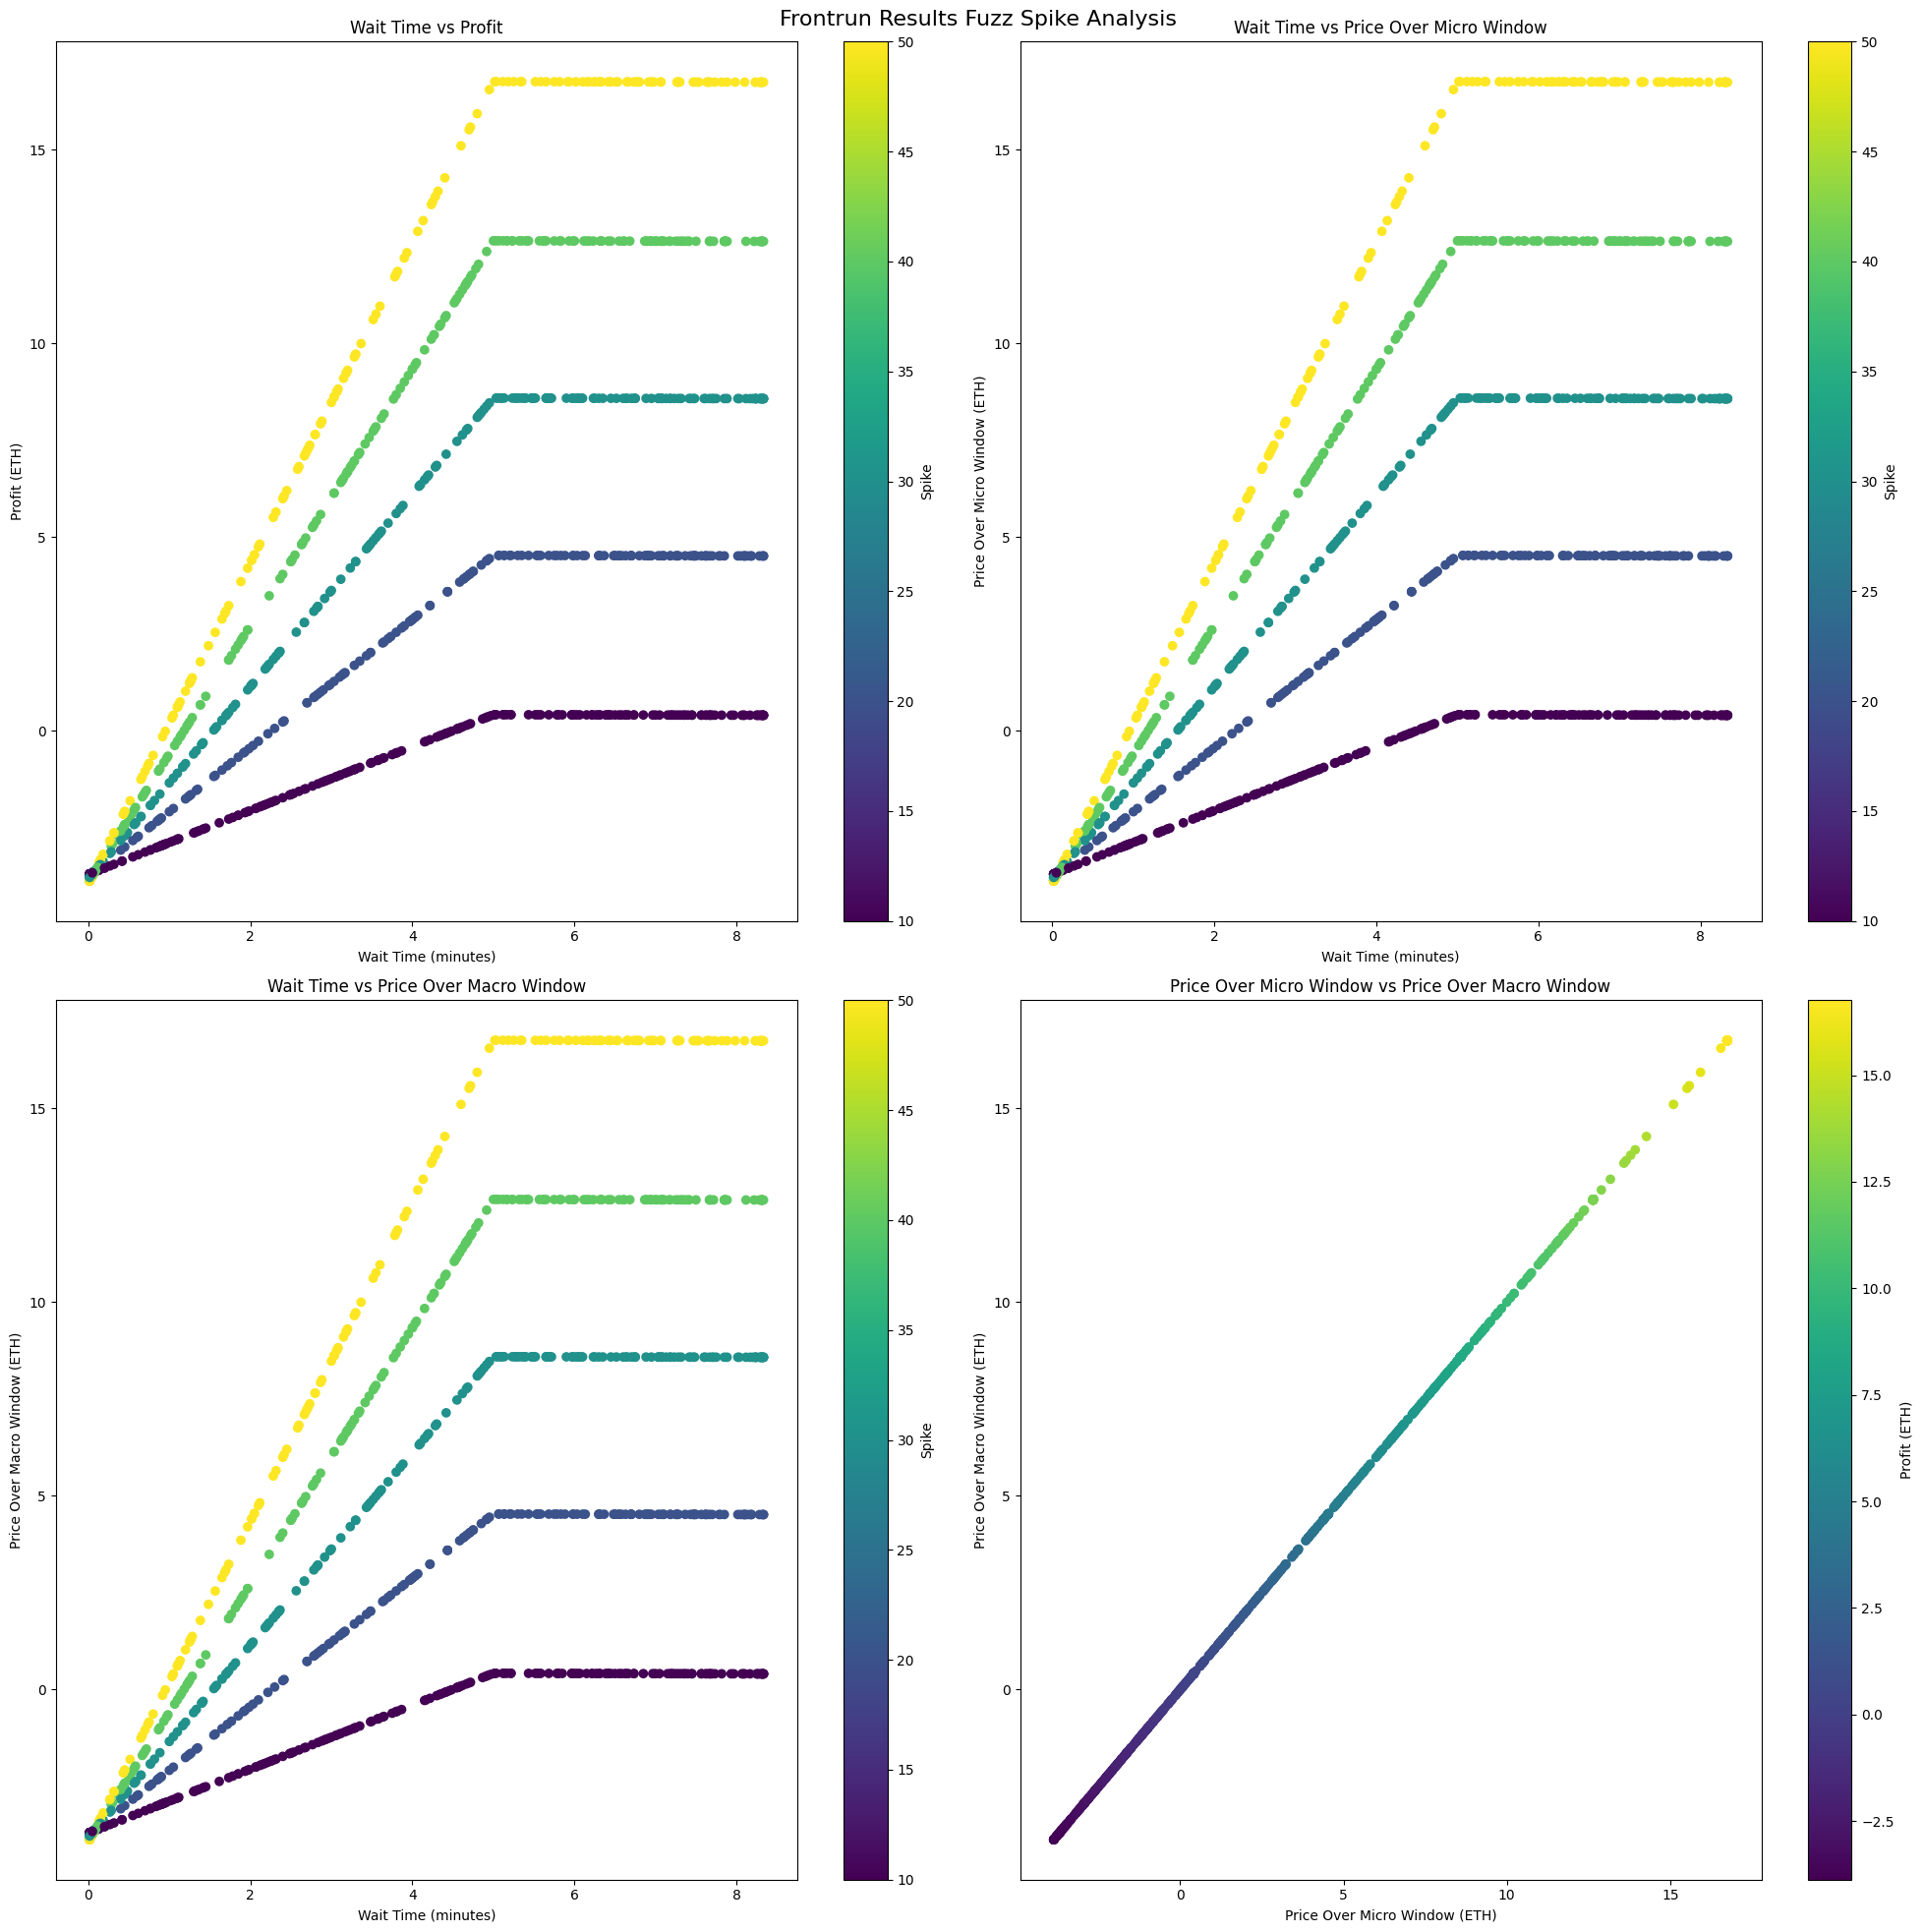

       waitTimeToUnwind        spike  priceOverMicroWindow  \
count       1002.000000  1002.000000           1002.000000   
mean         248.158683    29.461078              4.349581   
std          156.837909    14.153045              6.086267   
min            1.000000    10.000000             -3.873875   
25%          109.000000    20.000000             -0.607364   
50%          250.500000    30.000000              3.848393   
75%          391.000000    40.000000              8.585179   
max          500.000000    50.000000             16.758484   

       priceOverMacroWindow  waitTimeMinutes    profitETH  
count           1002.000000      1002.000000  1002.000000  
mean               4.349581         4.135978     4.349581  
std                6.086267         2.613965     6.086267  
min               -3.873875         0.016667    -3.873875  
25%               -0.607364         1.816667    -0.607364  
50%                3.848393         4.175000     3.848393  
75%                8.

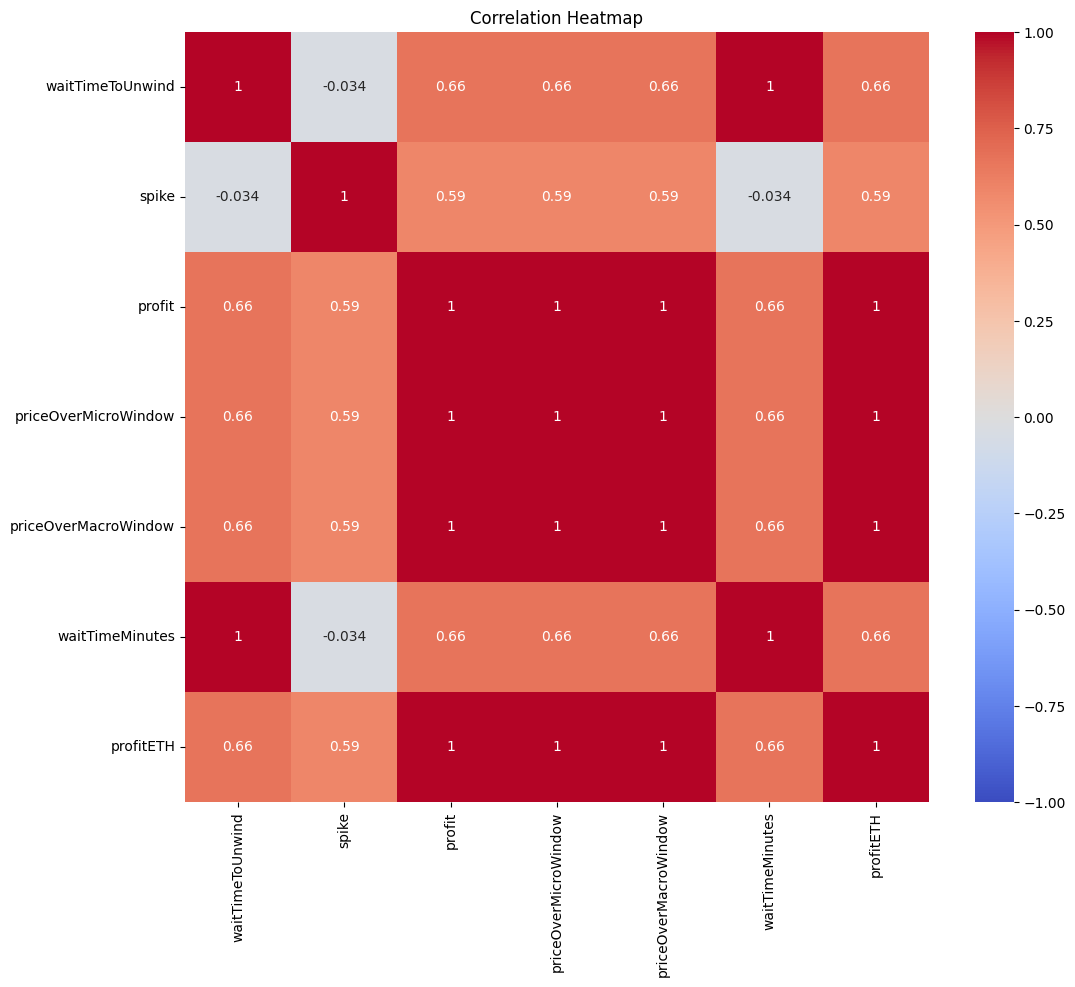

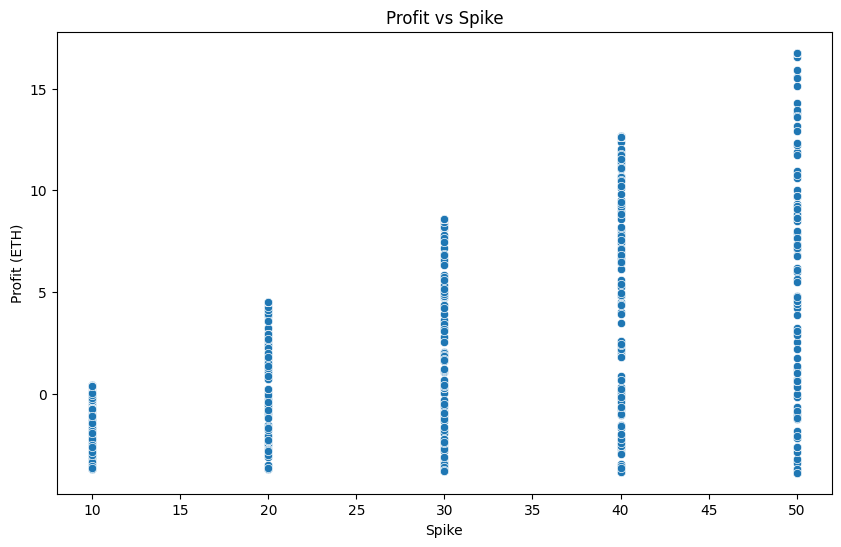

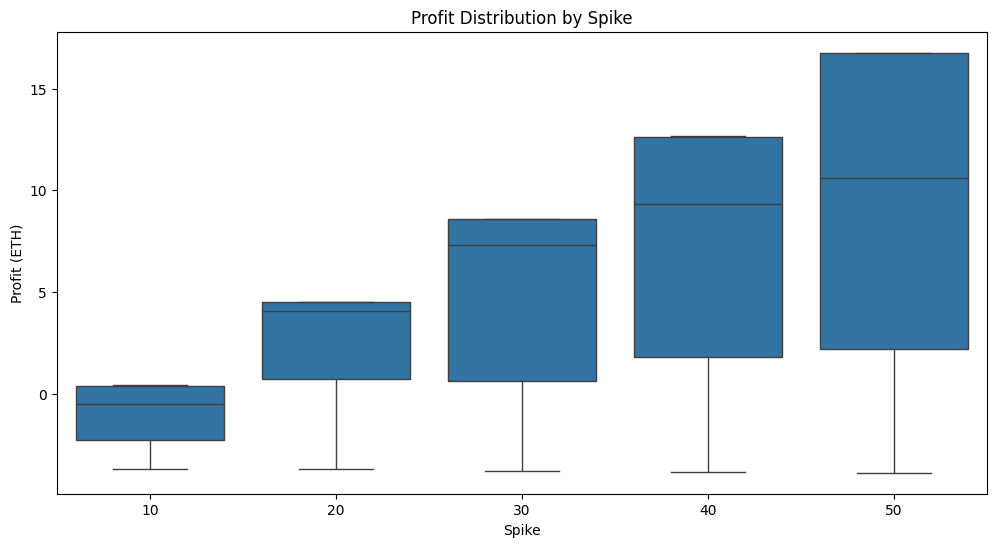

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('frontrun_results_fuzz_spike.csv')

# Convert waitTimeToUnwind to minutes
df['waitTimeMinutes'] = df['waitTimeToUnwind'] / 60

# Convert price columns from wei to ETH
for col in ['priceOverMicroWindow', 'priceOverMacroWindow']:
    df[col] = df['profit'].astype(float) / 1e18

# Convert profit to ETH
df['profitETH'] = df['profit'].astype(float) / 1e18

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Frontrun Results Fuzz Spike Analysis', fontsize=16)

# Function to create scatter plot with colors for spike
def scatter_plot_with_colors(x, y, color_col, ax, title, xlabel, ylabel):
    scatter = ax.scatter(df[x], df[y], c=df[color_col], cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Spike')

# Plot 1: Wait Time vs Profit
scatter_plot_with_colors('waitTimeMinutes', 'profitETH', 'spike', axs[0, 0], 
                         'Wait Time vs Profit', 'Wait Time (minutes)', 'Profit (ETH)')

# Plot 2: Wait Time vs Price Over Micro Window
scatter_plot_with_colors('waitTimeMinutes', 'priceOverMicroWindow', 'spike', axs[0, 1],
                         'Wait Time vs Price Over Micro Window', 'Wait Time (minutes)', 'Price Over Micro Window (ETH)')

# Plot 3: Wait Time vs Price Over Macro Window
scatter_plot_with_colors('waitTimeMinutes', 'priceOverMacroWindow', 'spike', axs[1, 0],
                         'Wait Time vs Price Over Macro Window', 'Wait Time (minutes)', 'Price Over Macro Window (ETH)')

# Plot 4: Price Over Micro Window vs Price Over Macro Window
scatter = axs[1, 1].scatter(df['priceOverMicroWindow'], df['priceOverMacroWindow'], c=df['profitETH'], cmap='viridis')
axs[1, 1].set_title('Price Over Micro Window vs Price Over Macro Window')
axs[1, 1].set_xlabel('Price Over Micro Window (ETH)')
axs[1, 1].set_ylabel('Price Over Macro Window (ETH)')
cbar = plt.colorbar(scatter, ax=axs[1, 1])
cbar.set_label('Profit (ETH)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print some basic statistics
print(df.describe())

# Find the wait time that resulted in the maximum profit
max_profit_row = df.loc[df['profitETH'].idxmax()]
print(f"\nMaximum profit of {max_profit_row['profitETH']:.6f} ETH was achieved with:")
print(f"- Wait time: {max_profit_row['waitTimeMinutes']:.2f} minutes")
print(f"- Spike: {max_profit_row['spike']}")

# Calculate correlations
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()

# Additional analysis: Profit vs Spike
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spike', y='profitETH', data=df)
plt.title('Profit vs Spike')
plt.xlabel('Spike')
plt.ylabel('Profit (ETH)')
plt.show()

# Box plot: Profit distribution for each Spike value
plt.figure(figsize=(12, 6))
sns.boxplot(x='spike', y='profitETH', data=df)
plt.title('Profit Distribution by Spike')
plt.xlabel('Spike')
plt.ylabel('Profit (ETH)')
plt.show()